In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [2]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [3]:
df=pd.read_csv('NSE-BSE.csv')
df.shape

(410, 8)

In [4]:
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']

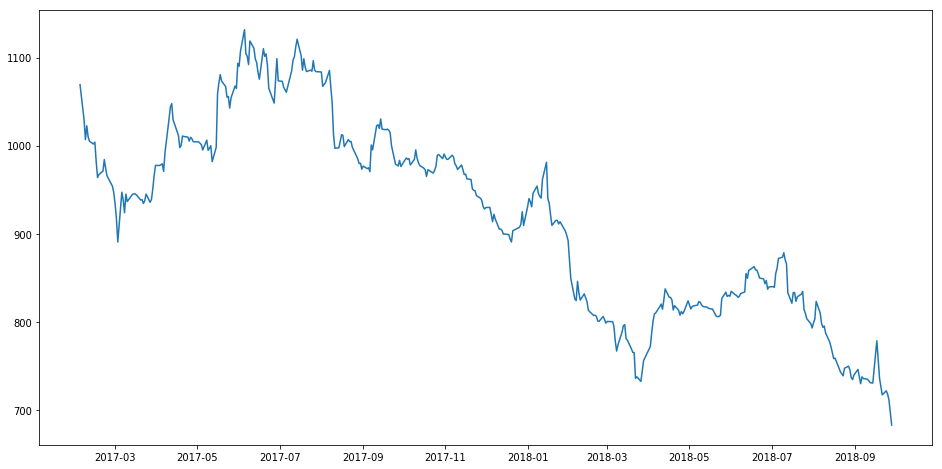

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='close history')

## LSTM implementation

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM

ModuleNotFoundError: No module named 'keras'

In [97]:
#creating new dataframe
data=df.sort_index(ascending=True, axis=0)
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [100]:
new_data.shape

(410, 2)

In [101]:
for i in range (0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]

In [102]:
new_data.index=new_data.Date


In [103]:
new_data.drop('Date',axis=1,inplace=True)
new_data.head()

,Close
Date,
2017-02-03,1069.2
2017-02-06,1029.2
2017-02-07,1006.8
2017-02-08,1022.6
2017-02-09,1010.05


In [ ]:
plt.figure(figsize=(16,8))

plt.plot(new_data['Close'])

In [105]:
dataset=new_data.values
dataset.shape

(410, 1)

In [115]:
train=dataset[0:300,:]
valid=dataset[300:,:]


In [116]:
valid

array([[813.1],
       [807.7],
       [811.8],
       [809.25],
       [812.05],
       [824.0],
       [814.8],
       [817.35],
       [818.25],
       [819.1],
       [823.15],
       [822.35],
       [819.3],
       [817.6],
       [816.85],
       [815.6],
       [815.15],
       [814.75],
       [814.8],
       [806.4],
       [806.05],
       [806.3],
       [807.6],
       [826.65],
       [833.8],
       [828.9],
       [830.2],
       [829.2],
       [834.8],
       [830.85],
       [830.1],
       [827.9],
       [829.15],
       [832.2],
       [834.1],
       [855.0],
       [849.6],
       [858.55],
       [859.4],
       [862.9],
       [859.1],
       [858.95],
       [854.9],
       [849.85],
       [848.85],
       [843.4],
       [847.05],
       [837.2],
       [839.75],
       [840.15],
       [839.25],
       [854.9],
       [860.95],
       [872.0],
       [873.45],
       [878.55],
       [870.5],
       [865.8],
       [833.05],
       [821.3],
       [833.35]

In [131]:
#normaloizing data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
scaled_data.shape

In [128]:
y_train.shape

(240,)

In [118]:
x_train,y_train=[],[]
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train

In [129]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(240, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

In [132]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [138]:
inputs.shape

(170, 1)

In [134]:
X_test = []
for i in range(0,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [135]:
X_test

array([array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64), array([], dtype=float64

In [139]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test

IndexError: tuple index out of range

In [140]:
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (170, 1)